<a href="https://colab.research.google.com/github/RounakMishra9905/DataScienceWinterProject-2023-Rounak-Mishra-/blob/main/230876_Rounak%20Mishra/Assignment%202/Assignment_2(Rounak_Mishra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from math import exp
import operator

In [ ]:
#Question 1:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Logistic regression from scratch[without normalisation]:
plt.rcParams["figure.figsize"] = (10, 6)
data = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

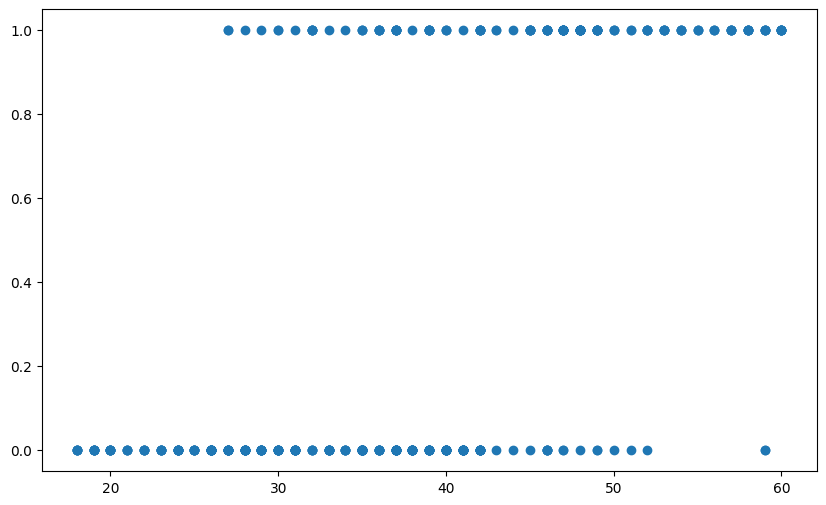

In [ ]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])
def logistic_regression(X, Y):
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1

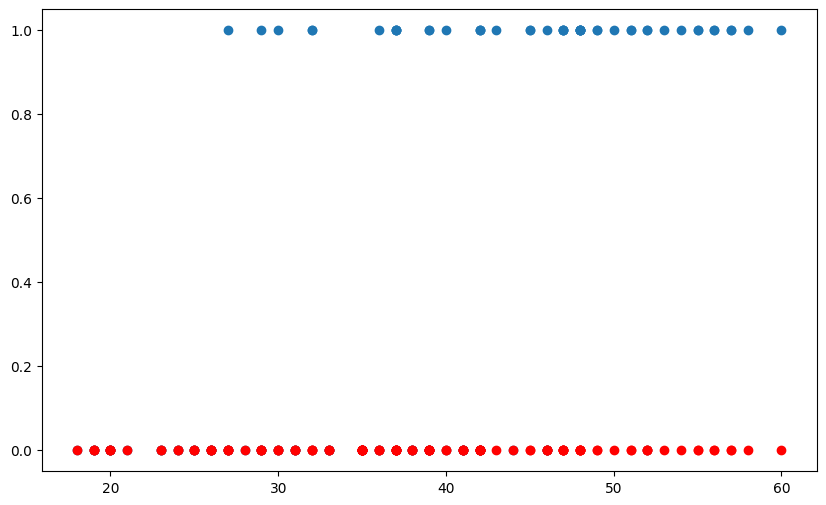

Accuracy = 0.6083333333333333


In [ ]:
b0, b1 = logistic_regression(X_train, y_train)
y_pred = predict(X_test, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


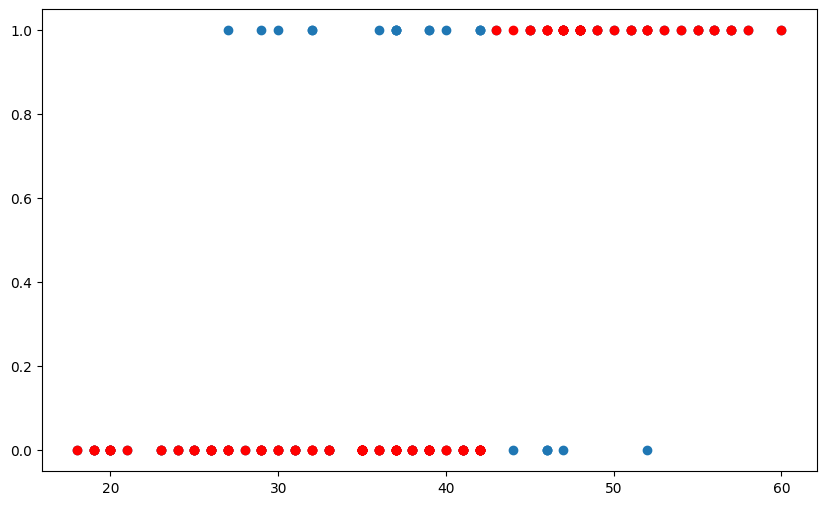

Accuracy = 0.8166666666666667


In [ ]:
#Using sklearn[without normalizationj]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")


In [ ]:
#Logistic regression from scratch[with normalisation]:
plt.rcParams["figure.figsize"] = (10, 6)
data = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

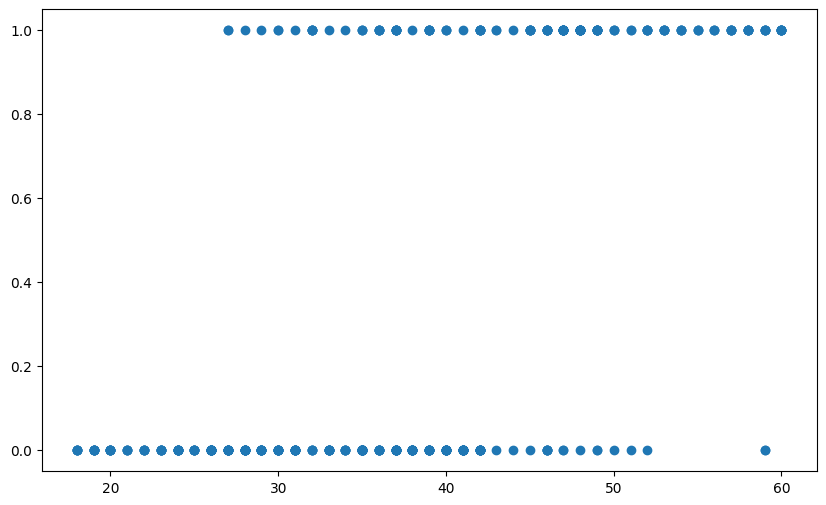

In [ ]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)
def normalize(X):
    return X - X.mean()
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])
def logistic_regression(X, Y):

    X = normalize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1





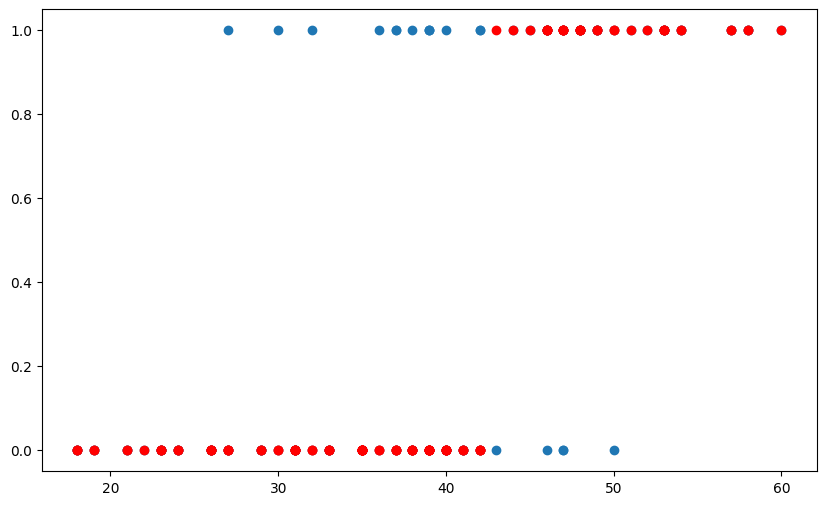

Accuracy = 0.85


In [ ]:
b0, b1 = logistic_regression(X_train, y_train)


X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


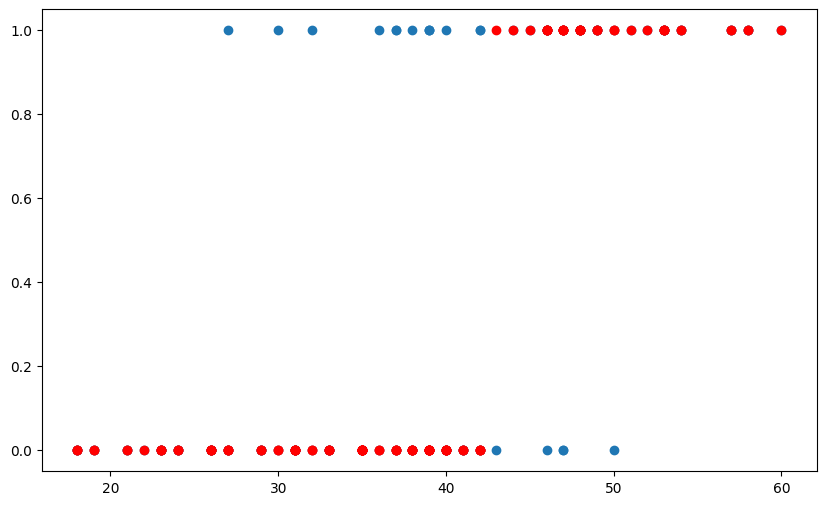

Accuracy = 0.85


In [ ]:
#Using sklearn[with normalizationj]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

In [ ]:
#Logistic regression from scratch[with standardization]:
plt.rcParams["figure.figsize"] = (10, 6)
data = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")


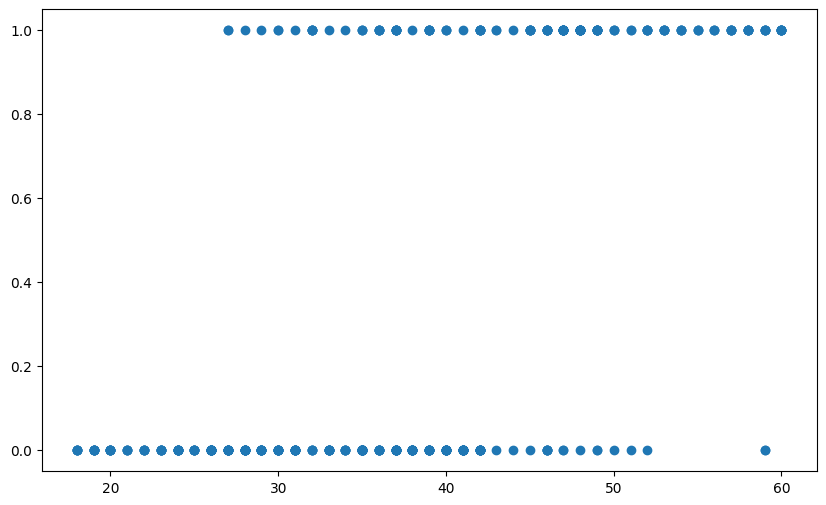

In [ ]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)
def standardize(X):
    mean_X = np.mean(X)
    std_X = np.std(X)
    X_std = (X - mean_X) / std_X
    return X_std
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])
def logistic_regression(X, Y):

    X = standardize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1


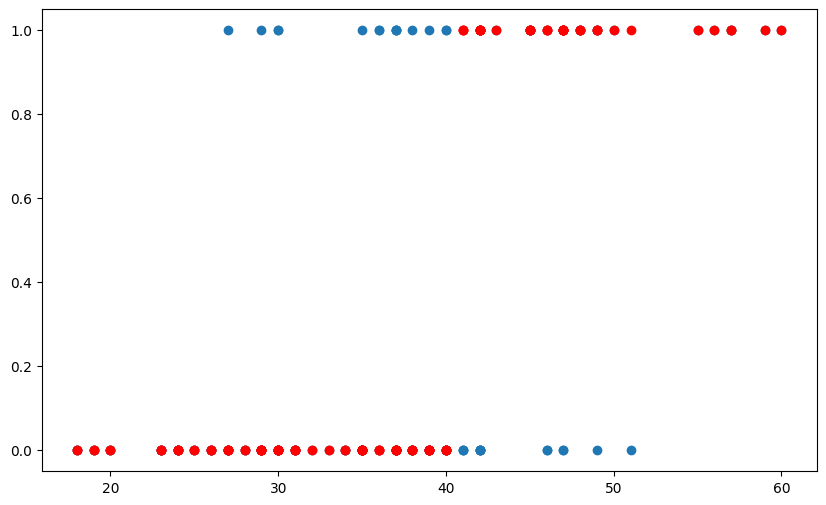

Accuracy = 0.7583333333333333


In [ ]:
b0, b1 = logistic_regression(X_train, y_train)


X_test_norm = standardize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


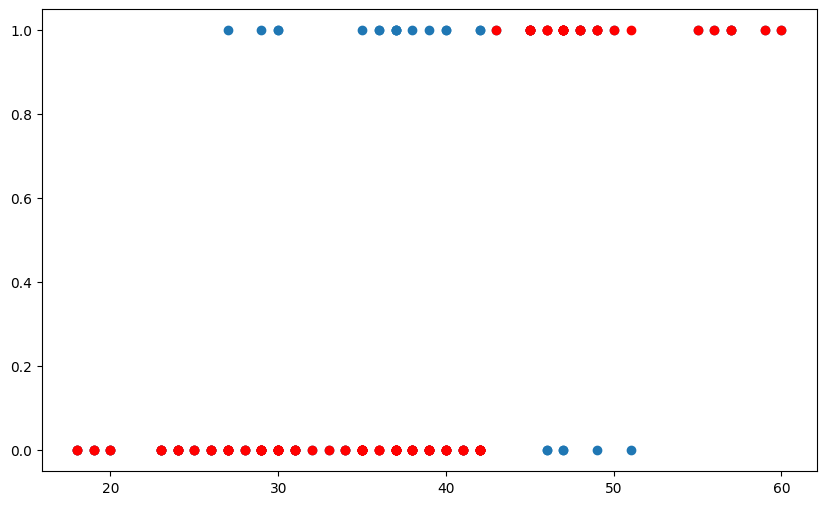

Accuracy = 0.8083333333333333


In [ ]:
#Logistic regression using sklearn[with standardization]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_std = scaler.transform(X_test.values.reshape(-1, 1))
lr_model = LogisticRegression()
lr_model.fit(X_train_std, y_train.values.reshape(-1, 1))
y_pred_sk = lr_model.predict(X_test_std)
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
accuracy = lr_model.score(X_test_std, y_test.values.reshape(-1, 1))
print(f"Accuracy = {accuracy}")


In [ ]:
#Question 2:

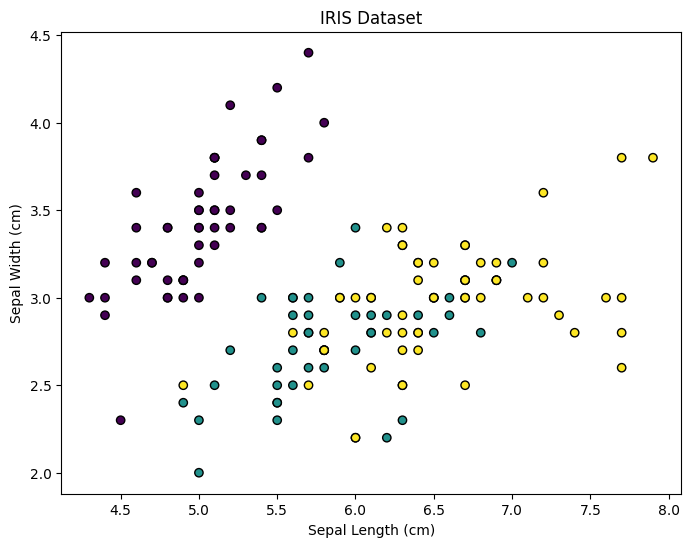

In [ ]:
#Using sklearn
from sklearn.preprocessing import LabelEncoder
file_path = '/content/drive/MyDrive/Iris.csv'
iris_df = pd.read_csv(file_path)
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['Species'])
X = iris_df.iloc[:, 1:5].values
y = iris_df['species'].values
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('IRIS Dataset')
plt.show()

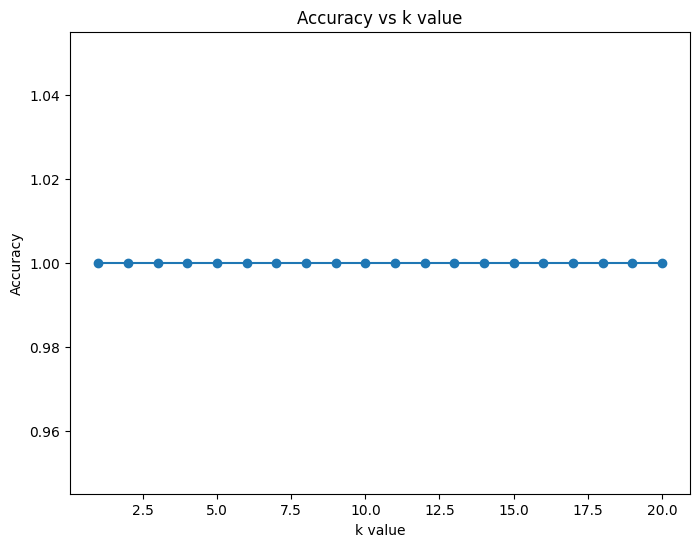

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_values = list(range(1, 21))
accuracy_scores = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)) for k in k_values]
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k value')
plt.show()


In [ ]:
#From Scratch:
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Defining our KNN model
def knn(trainingSet, testInstance, k):

    distances = {}
    sort = {}

    length = testInstance.shape[1]

    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):

        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1

    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2

    neighbors = []

    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}

    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]

        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5


testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

#### Start of STEP 2
# Setting number of neighbors = 1


print('\n\nWith 1 Nearest Neighbour \n\n')
k = 1
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted Class of the datapoint = ', result)

# Nearest neighbor
print('\nNearest Neighbour of the datapoints = ',neigh)


print('\n\nWith 3 Nearest Neighbours\n\n')
# Setting number of neighbors = 3
k = 3
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)

print('\n\nWith 5 Nearest Neighbours\n\n')
# Setting number of neighbors = 3
k = 5
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)




With 1 Nearest Neighbour 




UFuncTypeError: ignored